In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
#Fetch Images count from Fodlers

In [3]:
count = 0 
dirs = os.listdir('flowers/')
for dir in dirs:
    files = list(os.listdir('flowers/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'flowers Folder has '+ str(count) + ' Images')

daisy Folder has 763 Images
dandelion Folder has 1051 Images
rose Folder has 783 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
flowers Folder has 4314 Images


In [4]:
#Load Images into Arrays as Dataset

In [5]:
base_dir = 'flowers/'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4314 files belonging to 5 classes.
Using 3452 files for training.
Found 4314 files belonging to 5 classes.
Using 862 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [8]:
import matplotlib.pyplot as plt

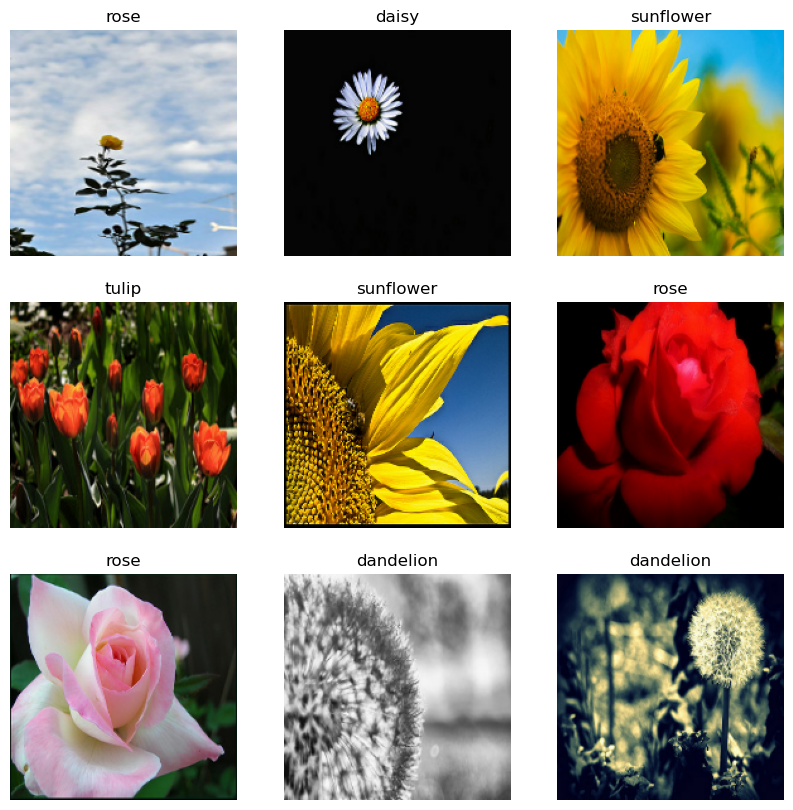

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\dell\Anaconda\Anaconda1\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


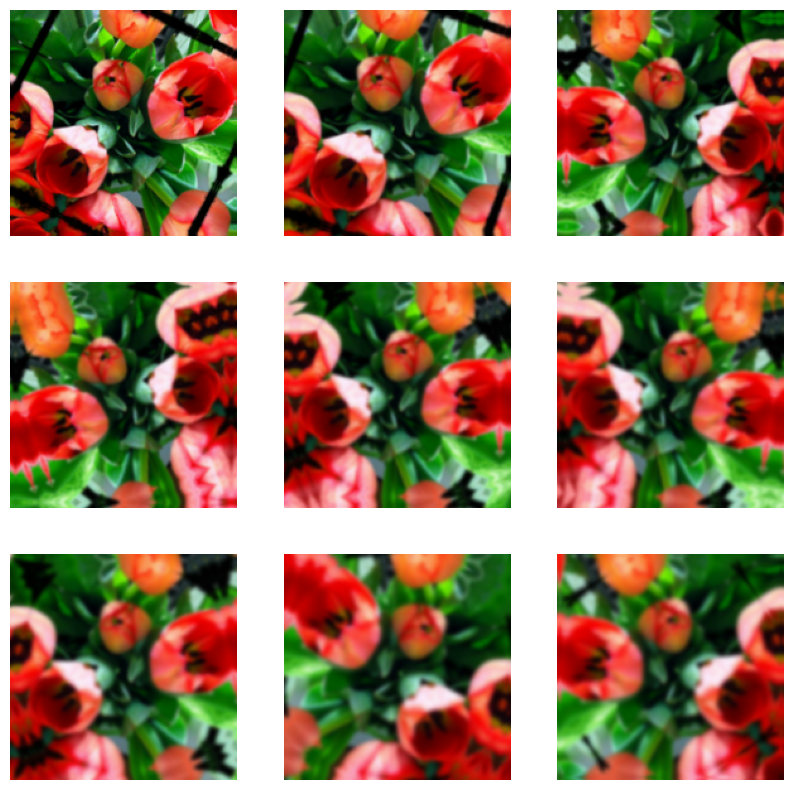

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [41]:
#Model Creation

In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 648ms/step - accuracy: 0.3585 - loss: 1.5254 - val_accuracy: 0.5046 - val_loss: 1.2157
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 509ms/step - accuracy: 0.5616 - loss: 1.1009 - val_accuracy: 0.5951 - val_loss: 1.0432
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 495ms/step - accuracy: 0.6347 - loss: 0.9565 - val_accuracy: 0.6125 - val_loss: 0.9623
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 62s 577ms/step - accuracy: 0.6505 - loss: 0.9010 - val_accuracy: 0.6079 - val_loss: 0.9731
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 60s 557ms/step - accuracy: 0.6679 - loss: 0.8533 - val_accuracy: 0.6555 - val_loss: 0.8865
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 67s 618ms/step - accuracy: 0.6754 - loss: 0.8384 - val_accuracy: 0.6555 - val_loss: 0.8912
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 60s 554ms/step - accuracy: 0.6930 - loss: 0.7610 - val_accuracy: 0.6508 - val_loss: 0.8615
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 62s 577ms/step - accuracy: 0.7068 - loss: 0

In [32]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [40]:
classify_images('Sample/dandelion.jpg.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'The Image belongs to dandelion with a score of 91.13091230392456'

In [36]:
model.save('Flower_Recog_Model.keras')